# Upper Confidence Bound (UCB)

## Importing the Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the Dataset

In [22]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

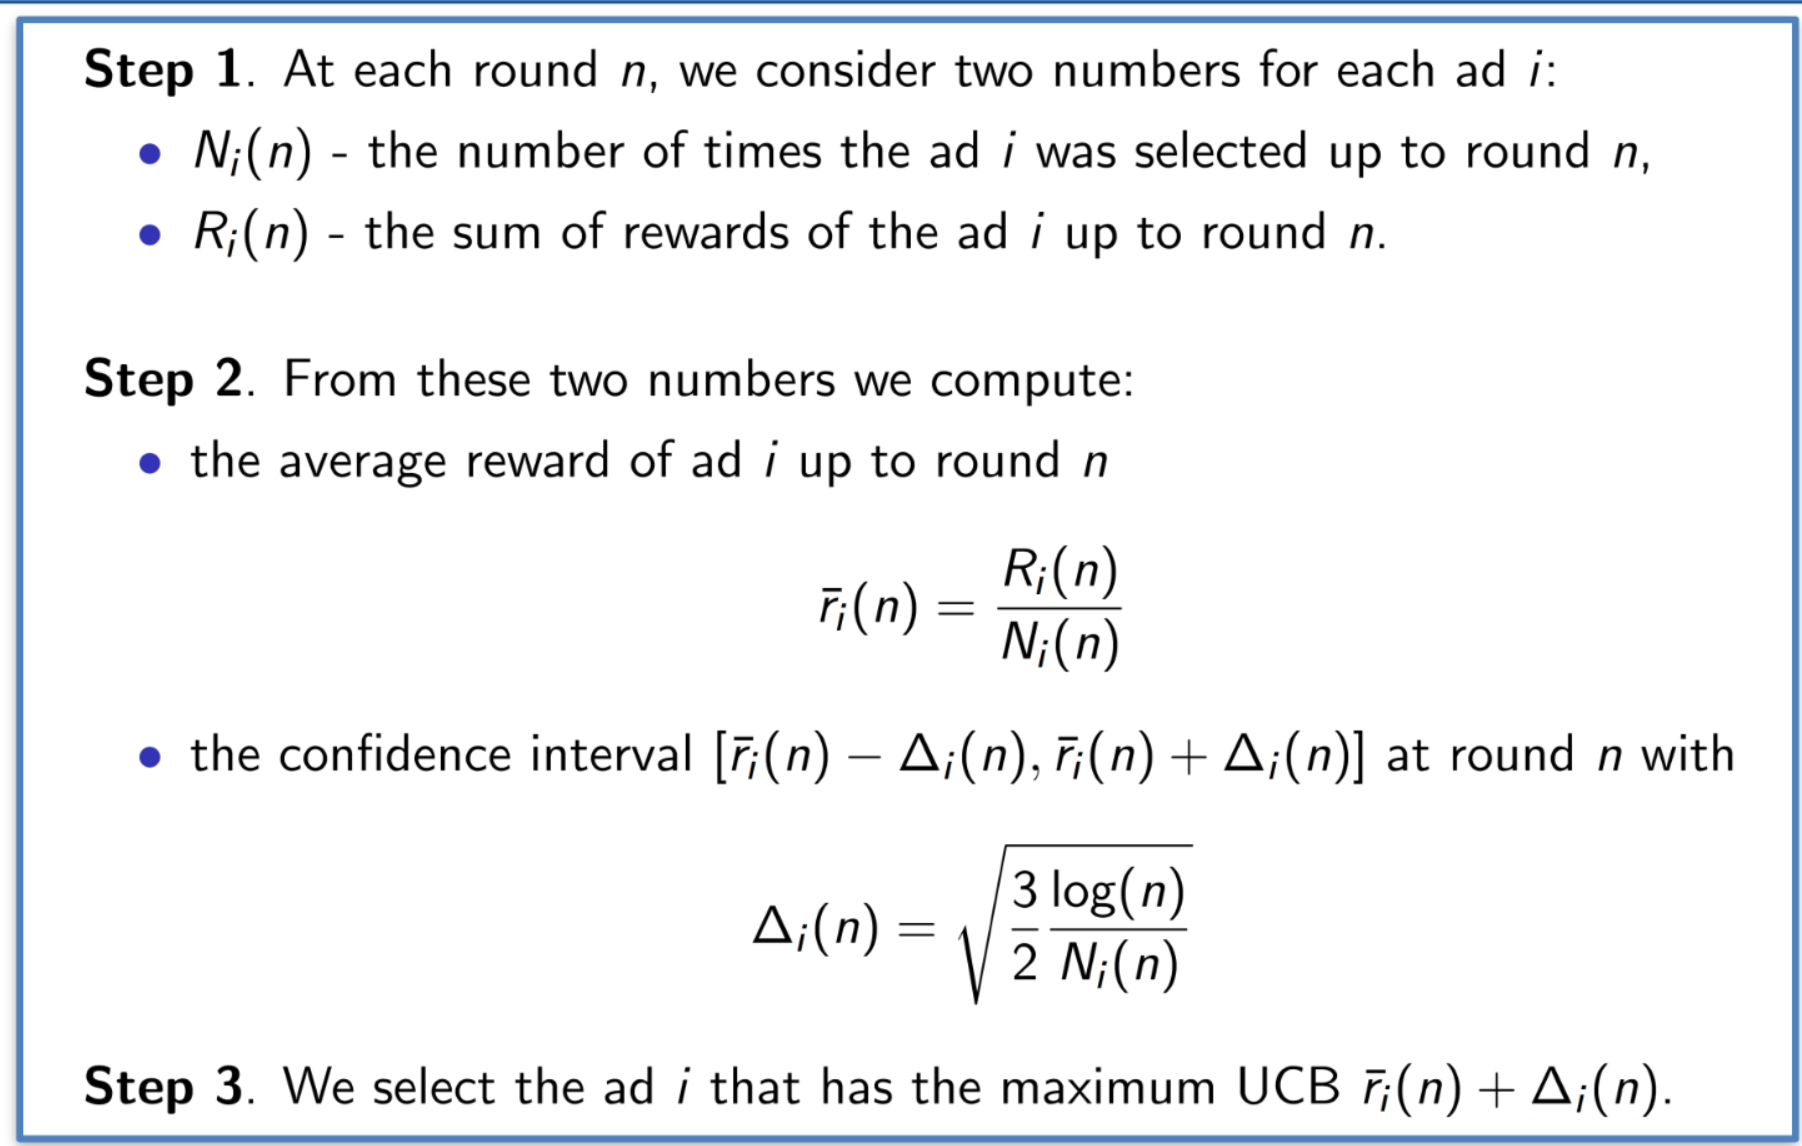

### Upper Confidence Bound (UCB) Algorithm

The Upper Confidence Bound (UCB) algorithm is a popular strategy used in multi-armed bandit problems, a class of problems in which you have to choose between different options (arms) to maximize some cumulative reward over time. UCB balances the trade-off between exploration (trying new things) and exploitation (choosing the best-known option).

### Detailed Explanation

#### Key Concepts

1. **Exploration vs. Exploitation**:
   - **Exploration**: Trying different actions to gather more information.
   - **Exploitation**: Choosing the action that has given the best results so far.

2. **Confidence Interval**:
   - UCB uses statistical confidence intervals to determine the next action.
   - The idea is to select actions that have the highest potential upper bound on the reward.

#### UCB Formula

For each action \( i \) at time \( t \), calculate the upper confidence bound \( UCB_i(t) \):

\[ UCB_i(t) = \bar{X}_i(t) + \sqrt{\frac{2 \ln t}{N_i(t)}} \]

Where:
- \( \bar{X}_i(t) \) is the average reward of action \( i \) up to time \( t \).
- \( N_i(t) \) is the number of times action \( i \) has been selected up to time \( t \).
- \( \ln t \) is the natural logarithm of the current time step \( t \).

#### Steps of the UCB Algorithm

1. **Initialization**:
   - Set the initial number of selections and sums of rewards for each action to zero.

2. **Selection**:
   - For each round \( n \):
     - Calculate the upper confidence bound for each action.
     - Select the action with the highest upper confidence bound.

3. **Update**:
   - Update the number of selections and the sum of rewards for the selected action.
   - Update the total reward.

In [23]:
N = 10000
d = 10
ads_selected: list[int] = []
numbers_of_selections: list[int] = [0] * d
sums_of_rewards: list[int] = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0

  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward: float = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i: float = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound: float = average_reward + delta_i
    else:
      # First time ad must be selected
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound: float = upper_bound
      ad: int = i
  
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward: int = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward: int = total_reward + reward

## Visualising the Results

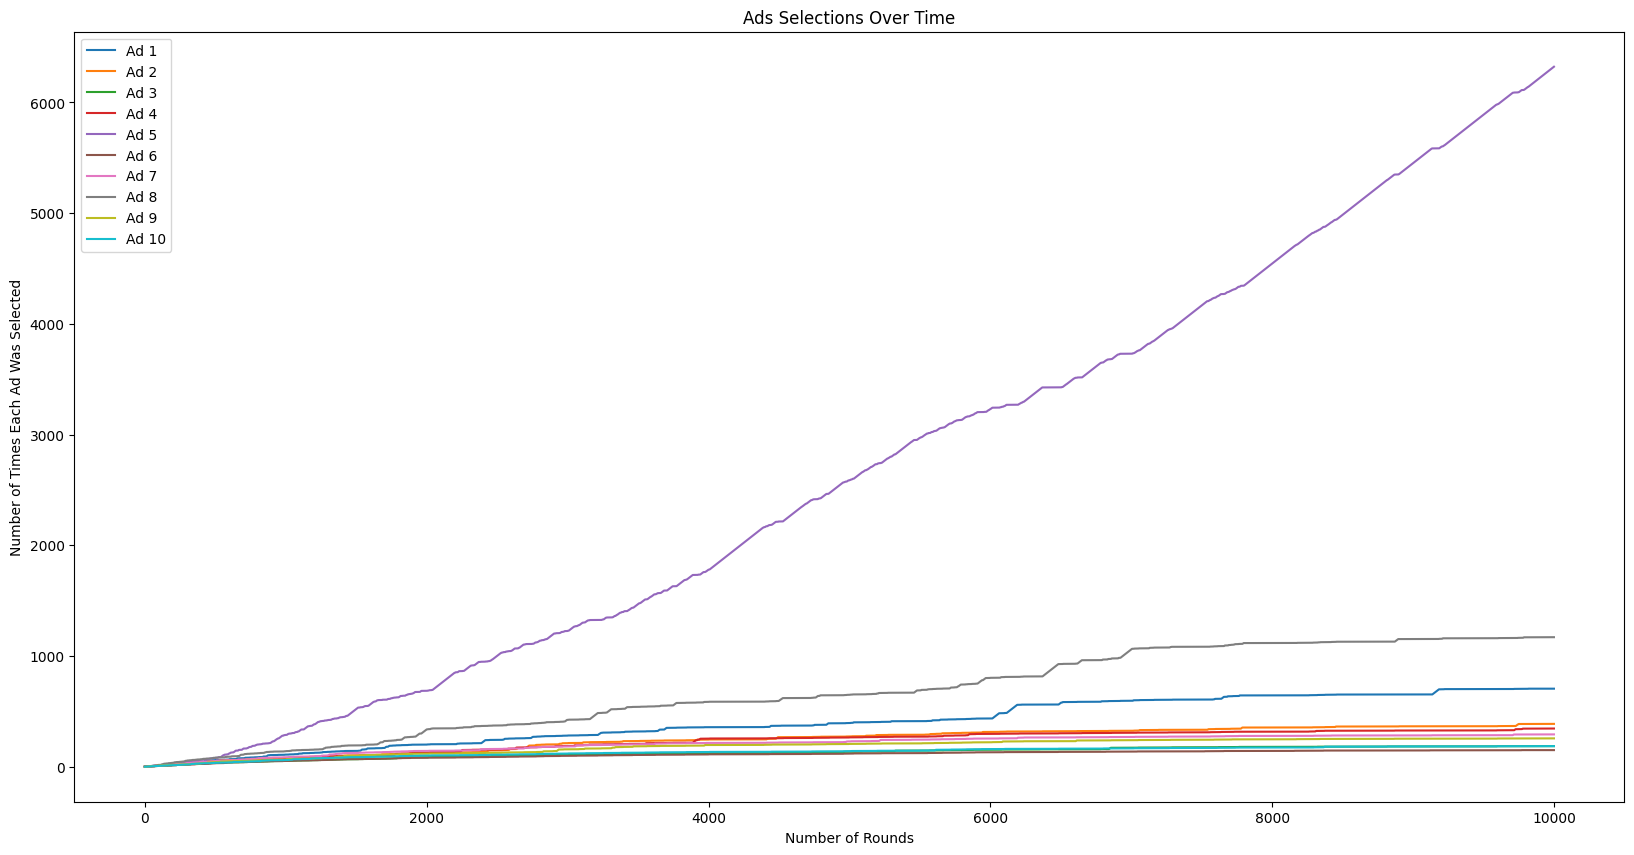

In [24]:
cumulative_selections: list[list[int]] = [[0] * N for _ in range(d)]
for n in range(N):
    for i in range(d):
        if n > 0:
            cumulative_selections[i][n] = cumulative_selections[i][n-1]
        if ads_selected[n] == i:
            cumulative_selections[i][n] += 1

plt.figure(figsize=(20, 10)) 
for i in range(d):
    plt.plot(cumulative_selections[i], label=f'Ad {i+1}')

plt.title('Ads Selections Over Time')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Times Each Ad Was Selected')
plt.legend()
plt.show()

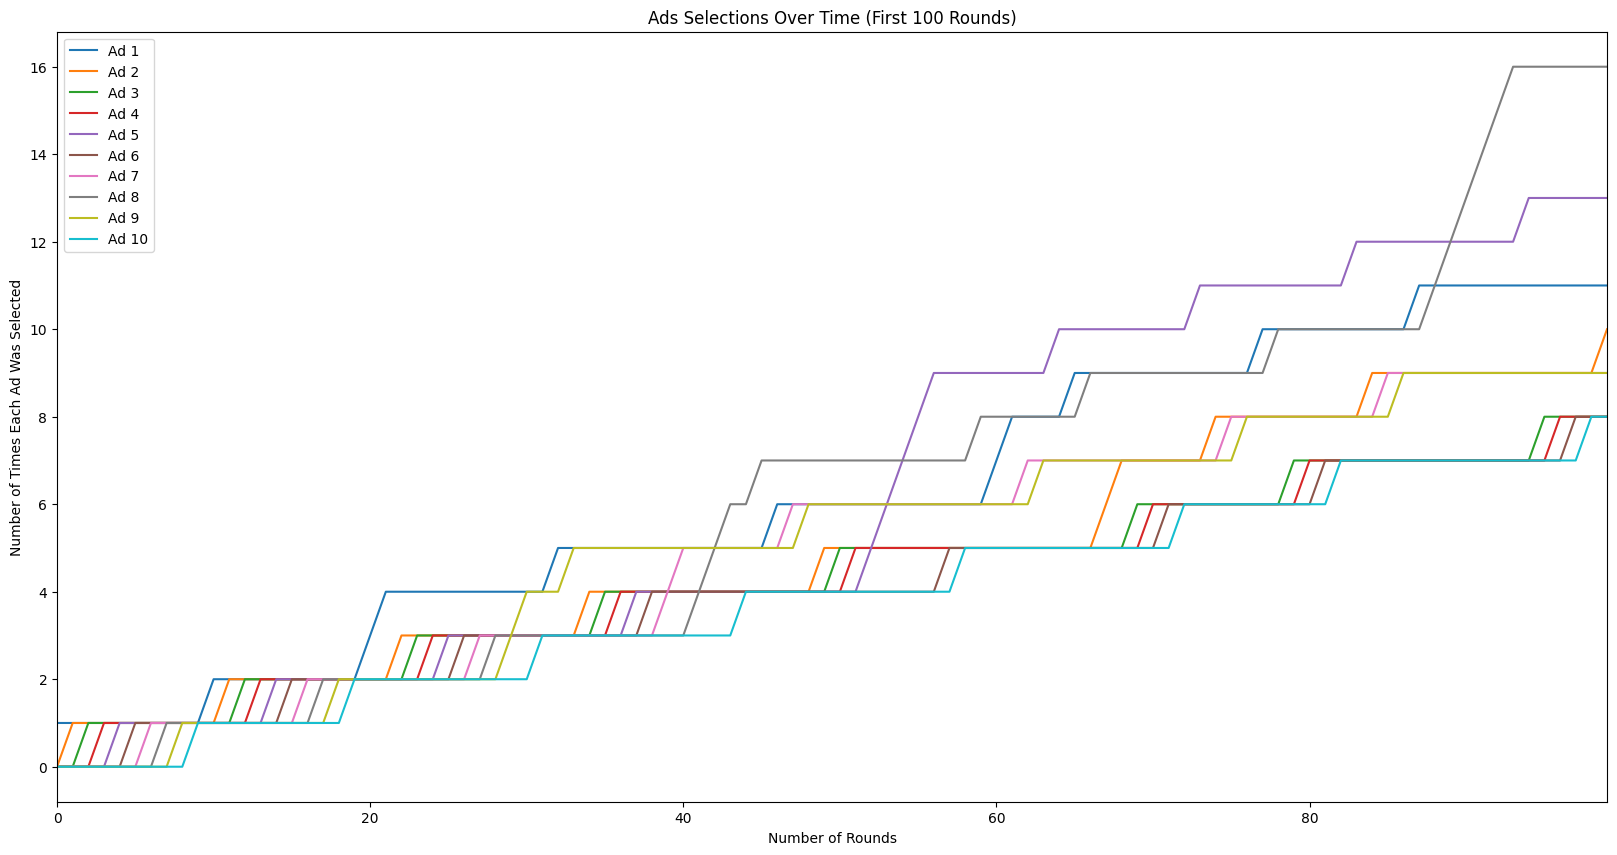

In [30]:
plt.figure(figsize=(20, 10))
for i in range(d):
    plt.plot(cumulative_selections[i][:100], label=f'Ad {i+1}')  # Limit to first 100 selections

plt.title('Ads Selections Over Time (First 100 Rounds)')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Times Each Ad Was Selected')
plt.xlim(0, 99)  
plt.legend()
plt.show()

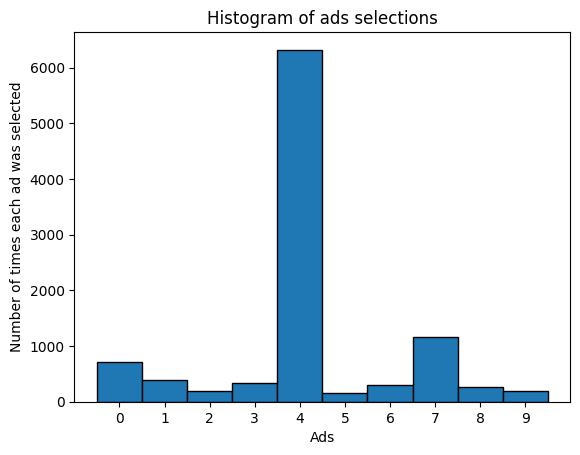

In [25]:
plt.hist(ads_selected, bins=np.arange(11) - 0.5, edgecolor='black')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.xticks(range(10)) 
plt.show()